In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold

# <a id="1"></a> 
#### <p style="background-color: #3498db; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);;color: #ffffff; font-family: 'Arial', sans-serif; font-size: 2.5em; text-align: center; font-weight: 300;">Importation et exploration des données</p> 

In [3]:
data = pd.read_csv("Data/dpe-v2-logements-neufs.csv", sep=",")

C:\Users\Gilles2608\AppData\Local\Temp\ipykernel_26052\1999230723.py:1: DtypeWarning: Columns (11,26,111,142,143,145,146,147,149,151,153,154,155,158,159,161,162,163,165,168,169,170,178,179,180,187,188,189,190,204,205,217,218) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Data/dpe-v2-logements-neufs.csv", sep=",")


In [4]:
data.head()

,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,Appartement_non_visité_(0/1),...,Présence_production_PV_(0/1),Production_électricité_PV_kWh,Production_électricité_PV_kWh/m²,Surface_totale_capteurs_photovoltaïque,Nombre_module,Type_énergie_principale_chauffage,Type_énergie_principale_ECS,Déperditions_totales_logement,Déperditions_totales_bâtiment,Conso_5_usages_é_finale_énergie_n°1
0,2133N0419762I,2021-09-30,2021-09-29,2021-09-29,DPE NEUF logement : RT2012,NaN,2031-09-28,1.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2648.3
1,2262N1677399D,2022-07-22,2022-07-20,2022-07-20,DPE NEUF logement : RT2012,NaN,2032-07-19,2.1,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,Électricité,NaN,NaN,NaN,1974.1
2,2378N3643699S,2023-10-26,2023-10-26,2023-10-24,DPE NEUF logement : RT2012,NaN,2033-10-25,2.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Électricité,NaN,NaN,NaN,4285.2
3,2492N4270998E,2024-12-03,2024-12-01,2024-12-01,DPE NEUF logement : RT2012,NaN,2034-11-30,2.4,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,Électricité,NaN,NaN,NaN,1475.5
4,2311N4325169N,2023-12-14,2023-12-13,2023-12-13,DPE NEUF logement : RT2012,NaN,2033-12-12,2.3,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,Électricité,NaN,NaN,NaN,1518.8


In [5]:
data.shape

(1009176, 220)

<div style="border-radius:5px;border:#283149 solid;background-color:#DBEDF3; padding:20px; font-size:15px"> 
    
Gestion des valeurs manquantes

In [7]:
data.isnull().values.any()

True

In [8]:
data.isnull().sum()

N°DPE                                        0
Date_réception_DPE                           0
Date_établissement_DPE                       0
Date_visite_diagnostiqueur                   0
Modèle_DPE                                   0
                                        ...   
Type_énergie_principale_chauffage       114362
Type_énergie_principale_ECS            1009176
Déperditions_totales_logement           940139
Déperditions_totales_bâtiment           940139
Conso_5_usages_é_finale_énergie_n°1          0
Length: 220, dtype: int64

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">
supression des colonnes avec plus de 50% de valeurs manquantes

In [10]:
data = data.dropna(axis=1, thresh=len(data) * 0.5)  # Supprime les colonnes avec +50% de NaN

In [11]:
data.shape

(1009176, 90)

In [12]:
data.head()

,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,Date_fin_validité_DPE,Version_DPE,Appartement_non_visité_(0/1),Méthode_application_DPE,Etiquette_DPE,...,Coût_refroidissement,Coût_refroidissement_dépensier,Coût_auxiliaires,Qualité_isolation_enveloppe,Qualité_isolation_menuiseries,Qualité_isolation_murs,Qualité_isolation_plancher_bas,Ubat_W/m²_K,Type_énergie_principale_chauffage,Conso_5_usages_é_finale_énergie_n°1
0,2133N0419762I,2021-09-30,2021-09-29,2021-09-29,DPE NEUF logement : RT2012,2031-09-28,1.0,0.0,dpe issu d'une étude thermique réglementaire R...,C,...,0.0,0.0,10.6,bonne,très bonne,très bonne,bonne,0.52,NaN,2648.3
1,2262N1677399D,2022-07-22,2022-07-20,2022-07-20,DPE NEUF logement : RT2012,2032-07-19,2.1,0.0,dpe issu d'une étude thermique réglementaire R...,A,...,0.0,0.0,20.0,très bonne,très bonne,très bonne,très bonne,0.33,Électricité,1974.1
2,2378N3643699S,2023-10-26,2023-10-26,2023-10-24,DPE NEUF logement : RT2012,2033-10-25,2.3,NaN,dpe issu d'une étude thermique réglementaire R...,A,...,0.0,0.0,27.7,très bonne,très bonne,très bonne,bonne,0.38,Électricité,4285.2
3,2492N4270998E,2024-12-03,2024-12-01,2024-12-01,DPE NEUF logement : RT2012,2034-11-30,2.4,0.0,dpe issu d'une étude thermique réglementaire R...,B,...,0.0,0.0,0.0,moyenne,très bonne,très bonne,très bonne,0.69,Électricité,1475.5
4,2311N4325169N,2023-12-14,2023-12-13,2023-12-13,DPE NEUF logement : RT2012,2033-12-12,2.3,0.0,dpe issu d'une étude thermique réglementaire R...,A,...,0.0,0.0,0.0,très bonne,très bonne,très bonne,très bonne,0.27,Électricité,1518.8


In [13]:
data.hist(bins=50, figsize=(120,80));

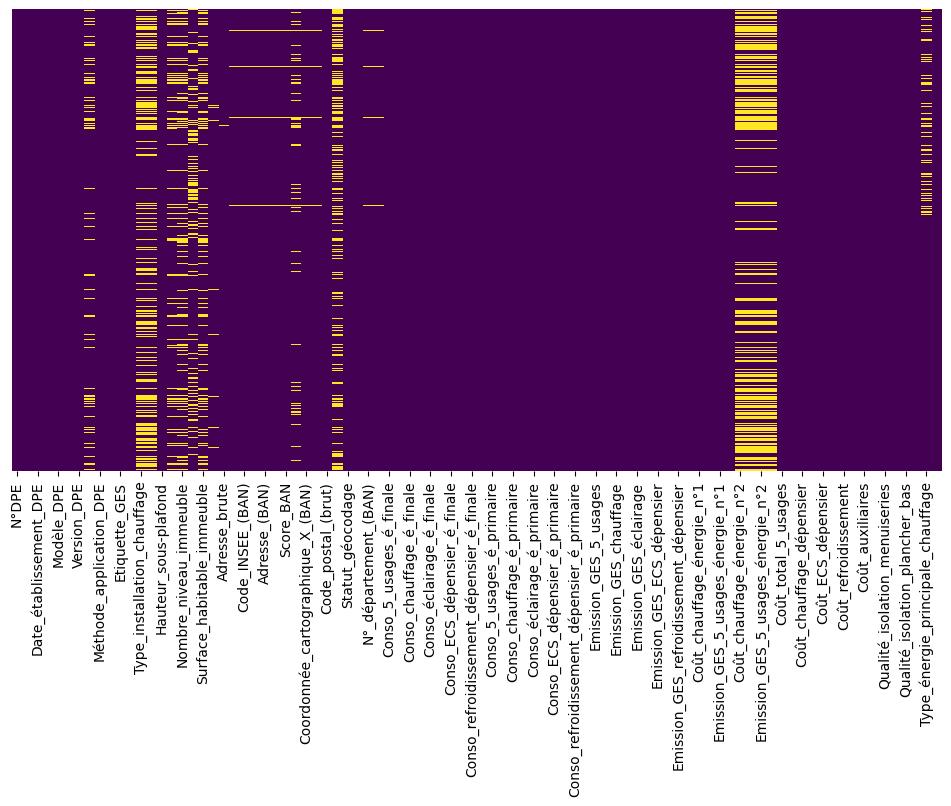

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.show()

In [15]:
data.nunique().sort_values()

Statut_géocodage                           2
Modèle_DPE                                 2
Appartement_non_visité_(0/1)               2
Type_bâtiment                              3
Type_installation_ECS_(général)            3
                                      ...   
Coordonnée_cartographique_X_(BAN)     194712
Coordonnée_cartographique_Y_(BAN)     194751
Adresse_brute                         250657
Complément_d'adresse_logement         413200
N°DPE                                1009176
Length: 90, dtype: int64

In [16]:
data.dtypes.value_counts()

float64    60
object     29
int64       1
Name: count, dtype: int64

In [17]:
# Supprimer toutes les colonnes ayant une seule valeur unique
cols_a_supprimer = data.nunique()[data.nunique() == 1].index
data = data.drop(columns=cols_a_supprimer)

In [18]:
data.shape

(1009176, 90)

In [19]:
cols_binaires = data.nunique()[data.nunique() == 2].index
cols_binaires

Index(['Modèle_DPE', 'Appartement_non_visité_(0/1)', 'Statut_géocodage'], dtype='object')

In [20]:
data[["Modèle_DPE","Appartement_non_visité_(0/1)","Statut_géocodage"]].head(10)

,Modèle_DPE,Appartement_non_visité_(0/1),Statut_géocodage
0,DPE NEUF logement : RT2012,0.0,adresse non géocodée ban car aucune correspond...
1,DPE NEUF logement : RT2012,0.0,adresse non géocodée ban car aucune correspond...
2,DPE NEUF logement : RT2012,NaN,adresse géocodée ban à l'adresse
3,DPE NEUF logement : RT2012,0.0,adresse non géocodée ban car aucune correspond...
4,DPE NEUF logement : RT2012,0.0,adresse non géocodée ban car aucune correspond...
5,DPE NEUF logement : RT2012,1.0,adresse géocodée ban à l'adresse
6,DPE NEUF logement : RT2012,0.0,adresse non géocodée ban car aucune correspond...
7,DPE NEUF logement : RT2012,0.0,adresse non géocodée ban car aucune correspond...
8,DPE NEUF logement : RT2012,0.0,adresse non géocodée ban car aucune correspond...
9,DPE NEUF logement : RT2012,NaN,adresse géocodée ban à l'adresse


In [21]:
data["Modèle_DPE"].unique()

array(['DPE NEUF logement : RT2012', 'DPE NEUF logement : RE2020'],
      dtype=object)

# <a id="1"></a> 
#### <p style="background-color: #3498db; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);;color: #ffffff; font-family: 'Arial', sans-serif; font-size: 2.5em; text-align: center; font-weight: 300;">Correlation entre les variables</p> 

In [39]:
data_ = data.select_dtypes(include=['number'])

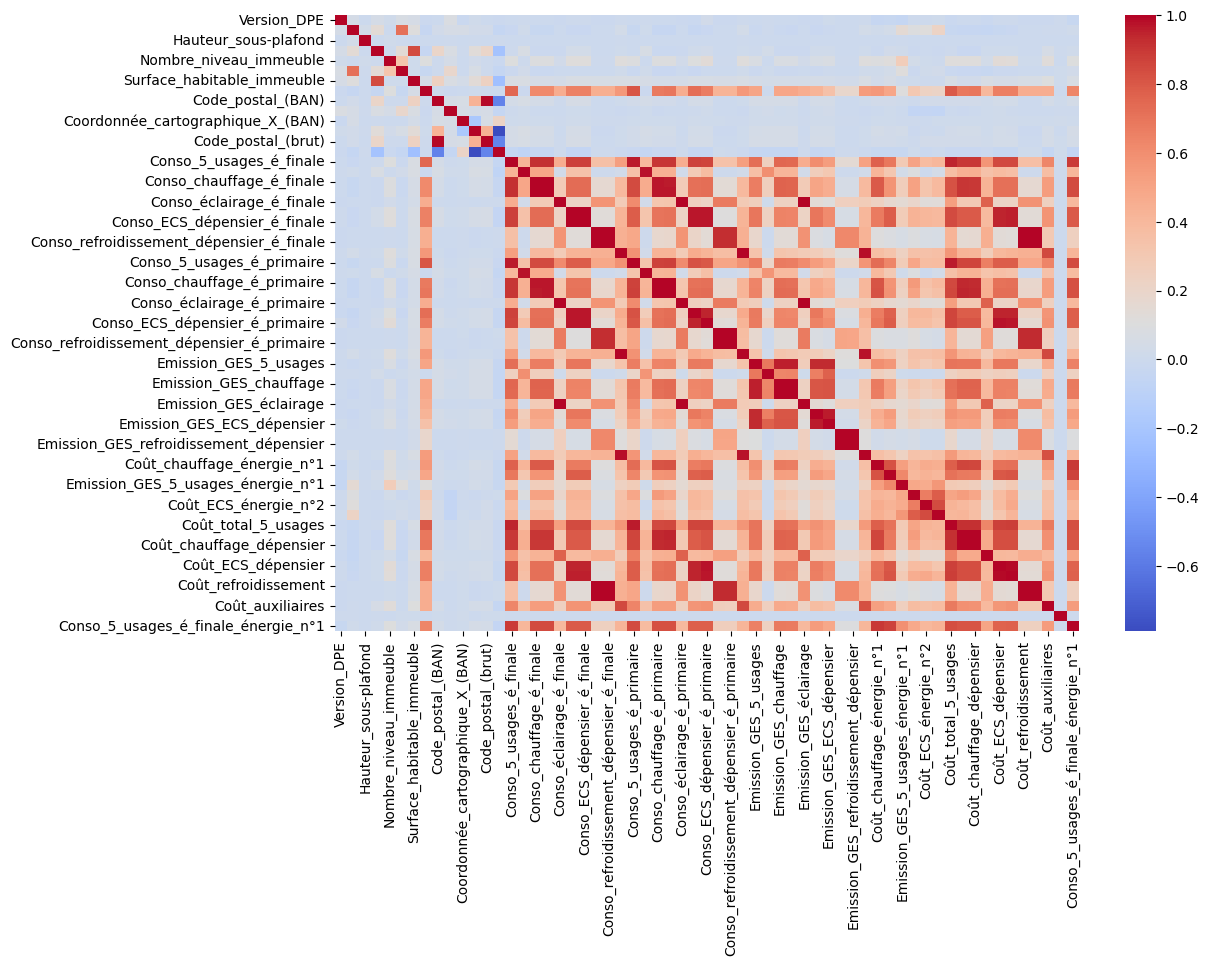

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(data_.corr(), cmap="coolwarm", annot=False)
plt.show()

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">
liste des colonnes avec une forte correlation (+90%)

In [45]:
# Définir un seuil de corrélation (ex : 0.9)
threshold = 0.9

# Trouver les paires de colonnes fortement corrélées
correlated_pairs = np.where((data_.corr() > threshold) & (data_.corr() < 1.0))

# Stocker les noms des colonnes à supprimer
correlated_columns = set()

for i in range(len(correlated_pairs[0])):
    col1 = data_.corr().columns[correlated_pairs[0][i]]
    col2 = data_.corr().columns[correlated_pairs[1][i]]
    correlated_columns.add(col2)  # Supprimer une des deux colonnes corrélées

print("Colonnes à supprimer :", correlated_columns)


Colonnes à supprimer : {'Emission_GES_éclairage', 'Conso_auxiliaires_é_primaire', 'Coût_refroidissement_dépensier', 'Emission_GES_ECS_dépensier', 'Emission_GES_auxiliaires', 'Conso_5_usages/m²_é_finale', 'Coût_refroidissement', 'Emission_GES_ECS', 'Conso_ECS_é_primaire', 'Conso_5_usages_é_primaire', 'Conso_chauffage_é_primaire', 'Code_postal_(brut)', 'Emission_GES_chauffage_dépensier', 'Conso_éclairage_é_finale', 'Coût_ECS', 'Conso_ECS_é_finale', 'Conso_ECS_dépensier_é_primaire', 'Conso_ECS_dépensier_é_finale', 'Conso_éclairage_é_primaire', 'Coût_chauffage_dépensier', 'Emission_GES_5_usages', 'Emission_GES_refroidissement_dépensier', 'Conso_5_usages_par_m²_é_primaire', 'Coût_ECS_dépensier', 'Conso_chauffage_dépensier_é_finale', 'Conso_chauffage_é_finale', 'Code_postal_(BAN)', 'Conso_refroidissement_dépensier_é_finale', 'Conso_refroidissement_dépensier_é_primaire', 'Conso_refroidissement_é_finale', 'Conso_refroidissement_é_primaire', 'Emission_GES_chauffage', 'Conso_5_usages_é_finale', 

In [46]:
# correlated_columns

In [56]:
# Liste des colonnes à supprimer (déjà identifiées)
colonnes_a_supprimer = list(correlated_columns)  # Assure-toi que c'est une liste

# Afficher les corrélations de ces colonnes avec le reste du dataset
corr_matrix = data_.corr()

# Sélectionner uniquement les lignes correspondant aux colonnes à supprimer
corr_suppression = corr_matrix.loc[colonnes_a_supprimer]

In [ ]:
corr_suppression

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">
on supprime ces colonnes car elle n'apportent pas d’information utile

In [58]:
data = data.drop(columns=correlated_columns)

In [60]:
data.shape

(1009176, 52)

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data_.corr(), cmap="coolwarm", annot=False)
plt.show()

In [66]:
threshold = 0.9

# Trouver les paires de colonnes fortement corrélées
correlated_pairs = np.where((data_.corr() > threshold) & (data_.corr() < 1.0))

# Stocker les noms des colonnes à supprimer
correlated_columns = set()

for i in range(len(correlated_pairs[0])):
    col1 = data_.corr().columns[correlated_pairs[0][i]]
    col2 = data_.corr().columns[correlated_pairs[1][i]]
    correlated_columns.add(col2)  # Supprimer une des deux colonnes corrélées

In [ ]:
correlated_columns

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">
notre data est plus exploitabtle

In [67]:
# Voir le % de valeurs manquantes par colonne
missing_values = data.isnull().mean() * 100
print(missing_values.sort_values(ascending=False))

Complément_d'adresse_logement          35.169386
Coût_chauffage_énergie_n°2             34.509045
Coût_ECS_énergie_n°2                   34.509045
Emission_GES_5_usages_énergie_n°2      34.509045
Type_énergie_n°2                       34.509045
Type_installation_ECS_(général)        31.150662
Type_installation_chauffage            31.150662
Surface_habitable_immeuble             17.930668
Nombre_niveau_immeuble                 17.486543
Nombre_niveau_logement                 15.252245
Nombre_appartement                     13.431255
Type_énergie_principale_chauffage      11.332216
Appartement_non_visité_(0/1)           10.998082
Nom__rue_(BAN)                         10.053350
N°_région_(BAN)                         0.942353
N°_département_(BAN)                    0.942353
Score_BAN                               0.890925
Nom__commune_(BAN)                      0.890925
Code_INSEE_(BAN)                        0.890925
Identifiant__BAN                        0.890925
Adresse_(BAN)       

# <a id="1"></a> 
#### <p style="background-color: #3498db; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);;color: #ffffff; font-family: 'Arial', sans-serif; font-size: 2.5em; text-align: center; font-weight: 300;">Gestion des valeurs manquantes et outliers</p> 

In [ ]:
data.isnull().values.any()

In [70]:
# Sélectionner uniquement les colonnes numériques
colonnes_numeriques = data.select_dtypes(include=['number'])

# Afficher le pourcentage de valeurs manquantes dans ces colonnes
missing_numeric = colonnes_numeriques.isnull().mean() * 100
print(missing_numeric[missing_numeric > 0].sort_values(ascending=False))

Coût_chauffage_énergie_n°2           34.509045
Coût_ECS_énergie_n°2                 34.509045
Emission_GES_5_usages_énergie_n°2    34.509045
Surface_habitable_immeuble           17.930668
Nombre_niveau_immeuble               17.486543
Nombre_niveau_logement               15.252245
Nombre_appartement                   13.431255
Appartement_non_visité_(0/1)         10.998082
N°_région_(BAN)                       0.942353
Score_BAN                             0.890925
Coordonnée_cartographique_X_(BAN)     0.890925
Coordonnée_cartographique_Y_(BAN)     0.890925
Surface_habitable_logement            0.872791
dtype: float64


In [72]:
data[["Coût_chauffage_énergie_n°2","Coût_ECS_énergie_n°2","Emission_GES_5_usages_énergie_n°2","Surface_habitable_immeuble"]].head(10)

,Coût_chauffage_énergie_n°2,Coût_ECS_énergie_n°2,Emission_GES_5_usages_énergie_n°2,Surface_habitable_immeuble
0,0.0,0.0,2.4,339.7
1,NaN,NaN,NaN,100.1
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,5048.4
4,NaN,NaN,NaN,93.2
5,NaN,NaN,NaN,NaN
6,3.0,3.0,12.7,71.6
7,NaN,NaN,NaN,3005.1
8,NaN,NaN,NaN,136.6
9,191.6,156.5,120.6,NaN


In [74]:
data["Surface_habitable_immeuble"].nunique()

17699

In [ ]:
colonnes_numeriques.describe()

In [ ]:
sns.set(style='whitegrid')
data.plot(kind='box',subplots=True,layout=(8,5),figsize=(20,40), color = "#6F266E")
plt.show()

In [76]:
columns_to_check = data.select_dtypes(include=['number']).columns

for column in columns_to_check:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    print(f"Number of outliers in column '{column}': {len(outliers)}")

    

Number of outliers in column 'Version_DPE': 100951
Number of outliers in column 'Appartement_non_visité_(0/1)': 132307
Number of outliers in column 'Hauteur_sous-plafond': 12489
Number of outliers in column 'Nombre_appartement': 65352
Number of outliers in column 'Nombre_niveau_immeuble': 2109
Number of outliers in column 'Nombre_niveau_logement': 74723
Number of outliers in column 'Surface_habitable_immeuble': 36200
Number of outliers in column 'Surface_habitable_logement': 35378
Number of outliers in column 'Score_BAN': 570
Number of outliers in column 'Coordonnée_cartographique_X_(BAN)': 1
Number of outliers in column 'Coordonnée_cartographique_Y_(BAN)': 510
Number of outliers in column 'N°_région_(BAN)': 0
Number of outliers in column 'Emission_GES_5_usages_par_m²': 2507
Number of outliers in column 'Coût_chauffage_énergie_n°1': 43897
Number of outliers in column 'Coût_ECS_énergie_n°1': 97157
Number of outliers in column 'Emission_GES_5_usages_énergie_n°1': 174732
Number of outlier

In [78]:
# Seuil de 5% pour décider de la suppression vs imputation
seuil = 0.05 * len(data)

# Colonnes numériques
columns_to_check = data.select_dtypes(include=['number']).columns

for column in columns_to_check:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifier les outliers
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    nb_outliers = outliers.sum()

    if nb_outliers < seuil:
        # Supprimer les lignes contenant ces outliers
        data = data[~outliers]
        print(f"Suppression de {nb_outliers} lignes pour la colonne '{column}'")
    else:
        # Imputer avec la médiane
        median_value = data[column].median()
        data.loc[outliers, column] = median_value
        print(f"Imputation des {nb_outliers} outliers dans '{column}' avec la médiane ({median_value})")


Imputation des 100951 outliers dans 'Version_DPE' avec la médiane (2.2)
Imputation des 132307 outliers dans 'Appartement_non_visité_(0/1)' avec la médiane (0.0)
Suppression de 12489 lignes pour la colonne 'Hauteur_sous-plafond'
Imputation des 64636 outliers dans 'Nombre_appartement' avec la médiane (23.0)
Suppression de 1866 lignes pour la colonne 'Nombre_niveau_immeuble'
Imputation des 68510 outliers dans 'Nombre_niveau_logement' avec la médiane (1.0)
Suppression de 36006 lignes pour la colonne 'Surface_habitable_immeuble'
Suppression de 32894 lignes pour la colonne 'Surface_habitable_logement'
Suppression de 541 lignes pour la colonne 'Score_BAN'
Suppression de 0 lignes pour la colonne 'Coordonnée_cartographique_X_(BAN)'
Suppression de 499 lignes pour la colonne 'Coordonnée_cartographique_Y_(BAN)'
Suppression de 0 lignes pour la colonne 'N°_région_(BAN)'
Suppression de 1774 lignes pour la colonne 'Emission_GES_5_usages_par_m²'
Suppression de 28059 lignes pour la colonne 'Coût_chauffa

In [80]:
data.shape

(809805, 52)

In [ ]:
sns.set(style='whitegrid')
data.plot(kind='box',subplots=True,layout=(8,5),figsize=(20,40), color = "#6F266E")
plt.show()

In [ ]:
data.isnull().values.any()

In [82]:
columns_to_check = data.select_dtypes(include=['number']).columns

for column in columns_to_check:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    print(f"Number of outliers in column '{column}': {len(outliers)}")

Number of outliers in column 'Version_DPE': 67638
Number of outliers in column 'Appartement_non_visité_(0/1)': 0
Number of outliers in column 'Hauteur_sous-plafond': 0
Number of outliers in column 'Nombre_appartement': 21967
Number of outliers in column 'Nombre_niveau_immeuble': 0
Number of outliers in column 'Nombre_niveau_logement': 0
Number of outliers in column 'Surface_habitable_immeuble': 9861
Number of outliers in column 'Surface_habitable_logement': 4584
Number of outliers in column 'Score_BAN': 0
Number of outliers in column 'Coordonnée_cartographique_X_(BAN)': 0
Number of outliers in column 'Coordonnée_cartographique_Y_(BAN)': 0
Number of outliers in column 'N°_région_(BAN)': 0
Number of outliers in column 'Emission_GES_5_usages_par_m²': 152
Number of outliers in column 'Coût_chauffage_énergie_n°1': 4537
Number of outliers in column 'Coût_ECS_énergie_n°1': 14917
Number of outliers in column 'Emission_GES_5_usages_énergie_n°1': 121423
Number of outliers in column 'Coût_chauffa

In [83]:
data.isnull().values.any()

True

In [86]:
# Vérifier le nombre de valeurs nulles par colonne
print(data.isnull().sum())


N°DPE                                       0
Date_réception_DPE                          0
Date_établissement_DPE                      0
Date_visite_diagnostiqueur                  0
Modèle_DPE                                  0
Date_fin_validité_DPE                       0
Version_DPE                                 0
Appartement_non_visité_(0/1)            79858
Méthode_application_DPE                     0
Etiquette_DPE                               0
Etiquette_GES                               0
Type_bâtiment                               0
Type_installation_chauffage            252159
Type_installation_ECS_(général)        252159
Hauteur_sous-plafond                        0
Nombre_appartement                     107260
Nombre_niveau_immeuble                 140806
Nombre_niveau_logement                 112175
Surface_habitable_immeuble             142505
Surface_habitable_logement               1374
Adresse_brute                              77
Nom__commune_(BAN)                

In [88]:
cat_cols = data.select_dtypes(include=['object']).columns  # Sélection des colonnes catégoriques

for col in cat_cols:
    if data[col].isnull().sum() / len(data) < 0.05:  # Si moins de 5% de valeurs nulles, on supprime
        data = data.dropna(subset=[col])
    else:  # Sinon, on impute avec la valeur la plus fréquente
        data[col].fillna(data[col].mode()[0], inplace=True)


C:\Users\Gilles2608\AppData\Local\Temp\ipykernel_26052\2448592478.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
C:\Users\Gilles2608\AppData\Local\Temp\ipykernel_26052\2448592478.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [89]:
data.isnull().values.any()

True

In [90]:
print(data.isnull().sum())

N°DPE                                       0
Date_réception_DPE                          0
Date_établissement_DPE                      0
Date_visite_diagnostiqueur                  0
Modèle_DPE                                  0
Date_fin_validité_DPE                       0
Version_DPE                                 0
Appartement_non_visité_(0/1)            79416
Méthode_application_DPE                     0
Etiquette_DPE                               0
Etiquette_GES                               0
Type_bâtiment                               0
Type_installation_chauffage                 0
Type_installation_ECS_(général)             0
Hauteur_sous-plafond                        0
Nombre_appartement                     106697
Nombre_niveau_immeuble                 139877
Nombre_niveau_logement                 111719
Surface_habitable_immeuble             141518
Surface_habitable_logement               1325
Adresse_brute                               0
Nom__commune_(BAN)                

In [94]:
data.shape

(801535, 52)

In [96]:
num_cols = data.select_dtypes(include=['number']).columns  # Colonnes numériques

for col in num_cols:
    if data[col].isnull().sum() / len(data) >= 0.05:  # Plus de 5% de valeurs nulles
        data[col].fillna(data[col].median(), inplace=True)  # Remplacement par la médiane


C:\Users\Gilles2608\AppData\Local\Temp\ipykernel_26052\3408225078.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)  # Remplacement par la médiane


In [98]:
cat_cols = data.select_dtypes(include=['object']).columns  # Colonnes catégoriques

for col in cat_cols:
    if data[col].isnull().sum() / len(data) >= 0.05:  # Plus de 5% de valeurs nulles
        data[col].fillna(data[col].mode()[0], inplace=True)  # Remplacement par la valeur la plus fréquente


In [100]:
print(data.isnull().sum())

N°DPE                                     0
Date_réception_DPE                        0
Date_établissement_DPE                    0
Date_visite_diagnostiqueur                0
Modèle_DPE                                0
Date_fin_validité_DPE                     0
Version_DPE                               0
Appartement_non_visité_(0/1)              0
Méthode_application_DPE                   0
Etiquette_DPE                             0
Etiquette_GES                             0
Type_bâtiment                             0
Type_installation_chauffage               0
Type_installation_ECS_(général)           0
Hauteur_sous-plafond                      0
Nombre_appartement                        0
Nombre_niveau_immeuble                    0
Nombre_niveau_logement                    0
Surface_habitable_immeuble                0
Surface_habitable_logement             1325
Adresse_brute                             0
Nom__commune_(BAN)                        0
Code_INSEE_(BAN)                

In [101]:
data["Surface_habitable_logement"].unique()

array([ 43.2, 100.1,  40.3, ...,  11.7,   8.6,  10.3])

In [104]:
median_value = data["Surface_habitable_logement"].median()
data["Surface_habitable_logement"].fillna(median_value, inplace=True)

C:\Users\Gilles2608\AppData\Local\Temp\ipykernel_26052\1556110499.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Surface_habitable_logement"].fillna(median_value, inplace=True)


In [106]:
print(data.isnull().sum())

N°DPE                                  0
Date_réception_DPE                     0
Date_établissement_DPE                 0
Date_visite_diagnostiqueur             0
Modèle_DPE                             0
Date_fin_validité_DPE                  0
Version_DPE                            0
Appartement_non_visité_(0/1)           0
Méthode_application_DPE                0
Etiquette_DPE                          0
Etiquette_GES                          0
Type_bâtiment                          0
Type_installation_chauffage            0
Type_installation_ECS_(général)        0
Hauteur_sous-plafond                   0
Nombre_appartement                     0
Nombre_niveau_immeuble                 0
Nombre_niveau_logement                 0
Surface_habitable_immeuble             0
Surface_habitable_logement             0
Adresse_brute                          0
Nom__commune_(BAN)                     0
Code_INSEE_(BAN)                       0
Identifiant__BAN                       0
Adresse_(BAN)   

In [109]:
data[["Adresse_brute","Adresse_(BAN)","Score_BAN","Nom__commune_(BAN)"]].head(10)

,Adresse_brute,Adresse_(BAN),Score_BAN,Nom__commune_(BAN)
0,42 rue de Venteille,42 Rue de Venteille 33185 Le Haillan,0.80,Le Haillan
1,RUE PRINCIPALE\nLOT 8,Rue Principale 62185 Fréthun,0.72,Fréthun
3,62 rue Jullien,62 Rue Jullien 92170 Vanves,0.97,Vanves
4,Rue des Rousillous,Rue des Rousillous 11200 Lézignan-Corbières,0.80,Lézignan-Corbières
5,231b rue de Lille,231b Rue de Lille 59650 Villeneuve-d'Ascq,0.75,Villeneuve-d'Ascq
6,RD 12,chemin vicinal 1 de la rd 836 à saint-cyr 9141...,0.21,Dourdan
7,Les Hauts de Kerdanné,rue de Kerdanné 29490 Guipavas,0.56,Guipavas
8,1 RUE DES PRES ELOYS,1 Rue des Pres Eloys 51500 Chamery,0.78,Chamery
9,AU BORD DU DROUET,Résidence du Drouet 22100 Trélivan,0.45,Trélivan
10,"39, avenue Marius Mathon",39 Rue Marius Mathon 69220 Belleville-en-Beauj...,0.55,Belleville-en-Beaujolais


In [ ]:
# Sauvegarde en format parquet (très rapide à charger)
data.to_parquet("data_cleaned.parquet")

# Sauvegarde en format pickle
data.to_pickle("data_cleaned.pkl")

In [ ]:
data.to_csv("data.csv", index=False)

In [115]:
data.columns

Index(['N°DPE', 'Date_réception_DPE', 'Date_établissement_DPE',
       'Date_visite_diagnostiqueur', 'Modèle_DPE', 'Date_fin_validité_DPE',
       'Version_DPE', 'Appartement_non_visité_(0/1)',
       'Méthode_application_DPE', 'Etiquette_DPE', 'Etiquette_GES',
       'Type_bâtiment', 'Type_installation_chauffage',
       'Type_installation_ECS_(général)', 'Hauteur_sous-plafond',
       'Nombre_appartement', 'Nombre_niveau_immeuble',
       'Nombre_niveau_logement', 'Surface_habitable_immeuble',
       'Surface_habitable_logement', 'Adresse_brute', 'Nom__commune_(BAN)',
       'Code_INSEE_(BAN)', 'Identifiant__BAN', 'Adresse_(BAN)', 'Score_BAN',
       'Nom__rue_(BAN)', 'Coordonnée_cartographique_X_(BAN)',
       'Coordonnée_cartographique_Y_(BAN)', 'Complément_d'adresse_logement',
       'Statut_géocodage', 'Nom__commune_(Brut)', 'N°_département_(BAN)',
       'N°_région_(BAN)', 'Emission_GES_5_usages_par_m²',
       'Coût_chauffage_énergie_n°1', 'Coût_ECS_énergie_n°1',
       'Emissi

In [117]:
df = data.copy()

In [121]:
df.columns = [
    'num_dpe', 'date_reception_dpe', 'date_etablissement_dpe',
    'date_visite_diagnostiqueur', 'modele_dpe', 'date_fin_validite_dpe',
    'version_dpe', 'appartement_non_visite', 'methode_application_dpe',
    'etiquette_dpe', 'etiquette_ges', 'type_batiment',
    'type_installation_chauffage', 'type_installation_ecs',
    'hauteur_sous_plafond', 'nombre_appartements', 'nombre_niveau_immeuble',
    'nombre_niveau_logement', 'surface_habitable_immeuble',
    'surface_habitable_logement', 'adresse_brute', 'nom_commune_ban',
    'code_insee_ban', 'identifiant_ban', 'adresse_ban', 'score_ban',
    'nom_rue_ban', 'coord_x_ban', 'coord_y_ban', 'complement_adresse_logement',
    'statut_geocodage', 'nom_commune_brut', 'num_departement_ban',
    'num_region_ban', 'emission_ges_5_usages_par_m2',
    'cout_chauffage_energie_1', 'cout_ecs_energie_1',
    'emission_ges_5_usages_energie_1', 'type_energie_1',
    'cout_chauffage_energie_2', 'cout_ecs_energie_2',
    'emission_ges_5_usages_energie_2', 'type_energie_2',
    'cout_eclairage', 'cout_auxiliaires', 'qualite_isolation_enveloppe',
    'qualite_isolation_menuiseries', 'qualite_isolation_murs',
    'qualite_isolation_plancher_bas', 'ubat_w_m2_k',
    'type_energie_principale_chauffage', 'conso_5_usages_finale_energie_1'
]

In [111]:
from sqlalchemy import create_engine

In [123]:

# Paramètres de connexion à PostgreSQL
host = "localhost"  # ou l'IP du serveur PostgreSQL
database = "Projet_DPE"
user = "postgres"
password = "challenge"
table_name = "DPE_Logement_Neuf"

# Créer une connexion à PostgreSQL
engine = create_engine(f"postgresql://{user}:{password}@{host}/{database}")

# Enregistrement du DataFrame dans PostgreSQL
df.to_sql(table_name, engine, if_exists="replace", index=False)

print("Dataset enregistré avec succès dans la base de données PostgreSQL !")

Dataset enregistré avec succès dans la base de données PostgreSQL !
